# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

# Importing data

In [2]:
world=pd.read_csv(r"C:\Users\Mano\Documents\imarticus\world_population.csv")

In [3]:
world

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [4]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

# 2.To check null values

In [5]:
world.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [6]:
ObjectCol = world.columns[1:5]
ObjectCol

Index(['CCA3', 'Country', 'Capital', 'Continent'], dtype='object')

In [7]:
ContinousCol=world.columns[5:]
ContinousCol

Index(['2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [8]:

for i in ObjectCol:
    for j in world[i]:
        if(j.isalpha() or " " in j):
            continue
        else:
            print("There is a Special Character in",i,"The Values is ",j)

There is a Special Character in Country The Values is  Guinea-Bissau
There is a Special Character in Country The Values is  Timor-Leste
There is a Special Character in Capital The Values is  Porto-Novo
There is a Special Character in Capital The Values is  N'Djamena
There is a Special Character in Capital The Values is  Basse-Terre
There is a Special Character in Capital The Values is  Port-au-Prince
There is a Special Character in Capital The Values is  Fort-de-France
There is a Special Character in Capital The Values is  Saint-Denis
There is a Special Character in Capital The Values is  Saint-Pierre
There is a Special Character in Capital The Values is  Nuku‘alofa
There is a Special Character in Capital The Values is  Port-of-Spain
There is a Special Character in Capital The Values is  Port-Vila
There is a Special Character in Capital The Values is  Mata-Utu


<a id="section-one"></a>
# 2.Continent population characteristics

<a id="subsection-one-one"></a>
## Percentages of world population

In [9]:
continents = world.groupby(['Continent'],as_index=False)['World Population Percentage'].agg([max,sum])
continents

,max,sum
Continent,,
Africa,2.74,17.87
Asia,17.88,59.19
Europe,1.81,9.33
North America,4.24,7.51
Oceania,0.33,0.55
South America,2.70,5.48


Text(0.5, 1.0, 'World population by Continent')

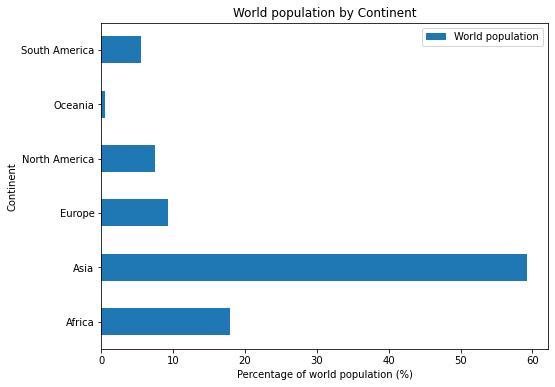

In [10]:
continents.plot(kind="barh", y='sum',figsize=(8,6),label='World population')
plt.xlabel("Percentage of world population (%)")
plt.title("World population by Continent")

<a id="subsection-one-two"></a>
## Number of countries

In [11]:
## Two ways to show the same worldrint(world['Continent'].value_counts(),"\n")
print(world.groupby('Continent')['Country'].count(),"\n")
print(world['Continent'].value_counts(),"\n")
print(world.groupby('Continent')['Country'].count(),"\n")

Continent
Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: Country, dtype: int64 

Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: Continent, dtype: int64 

Continent
Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: Country, dtype: int64 



([<matplotlib.patches.Wedge at 0x197bb36eac0>,
 [Text(0.7933226911635385, 0.7619967898128187, 'Africa'),
  Text(-0.6489509921990213, 0.8881793792494318, 'Europe'),
  Text(-1.0119773781913737, -0.43116329392576286, 'Asia'),
  Text(0.04429258293469795, -1.099107896021575, 'North America'),
  Text(0.8520655026864785, -0.6956898584366735, 'Oceania'),
  Text(1.0806265254874028, -0.20553907758142614, 'South America')],
 [Text(0.4327214679073846, 0.4156346126251738, '24.4%'),
  Text(-0.3539732684721934, 0.4844614795905991, '21.4%'),
  Text(-0.5519876608316583, -0.23517997850496153, '21.4%'),
  Text(0.024159590691653424, -0.59951339782995, '17.1%'),
  Text(0.4647630014653519, -0.3794671955109128, '9.8%'),
  Text(0.589432650265856, -0.11211222413532333, '6.0%')])

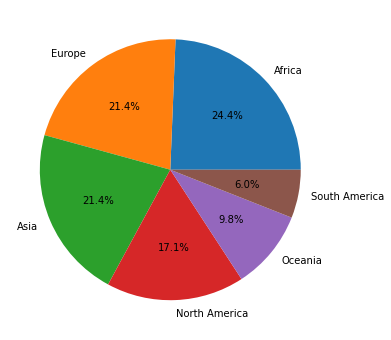

In [12]:
plt.subplots(figsize=(6,6))
plt.pie(world['Continent'].value_counts(),labels=['Africa', 'Europe', 'Asia', 'North America', 'Oceania',
       'South America'],autopct="%1.1f%%")

<a id="subsection-one-three"></a>

## Area of each continent (km2)

In [13]:
world.groupby('Continent')['Area (km²)'].sum()

Continent
Africa           30317963
Asia             32138141
Europe           23010411
North America    24244178
Oceania           8515081
South America    17833382
Name: Area (km²), dtype: int64

In [14]:

continentsarea = world.groupby(['Continent'],as_index=False)['Area (km²)'].sum().sort_values(by='Area (km²)', ascending=False)


Text(0.5, 1.0, 'Area (km2) per continent')

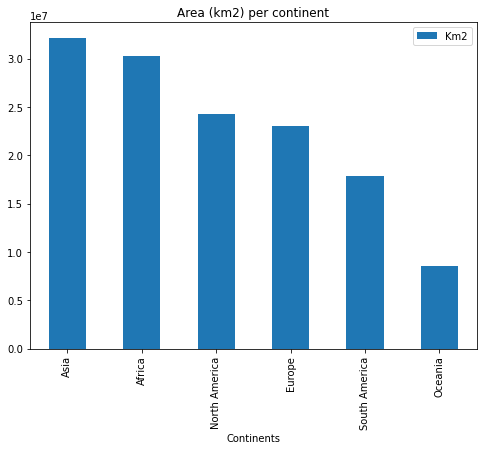

In [15]:
continentsarea.plot(kind="bar", x= 'Continent', y='Area (km²)',figsize=(8,6),label='Km2')
plt.xlabel("Continents")
plt.title("Area (km2) per continent")

# Number format for a column

In [16]:
continentsarea.style.format({"Area (km²)":"{:,.0f}"})


,Continent,Area (km²)
1,Asia,"32,138,141"
0,Africa,"30,317,963"
3,North America,"24,244,178"
2,Europe,"23,010,411"
5,South America,"17,833,382"
4,Oceania,"8,515,081"


<a id="section-two"></a>

# 3.Analysis of countries

<a id="subsection-two-one"></a>

## Top 10 countries more populated in 2022

In [17]:
top10countries = world.nlargest(10,['2022 Population','World Population Percentage'])
top10countries

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
149,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
16,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15
171,9,RUS,Russia,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81
131,10,MEX,Mexico,Mexico City,North America,127504125,125998302,120149897,112532401,97873442,81720428,67705186,50289306,1964375,64.9082,1.0063,1.60


Text(0.5, 0, 'World population (%)')

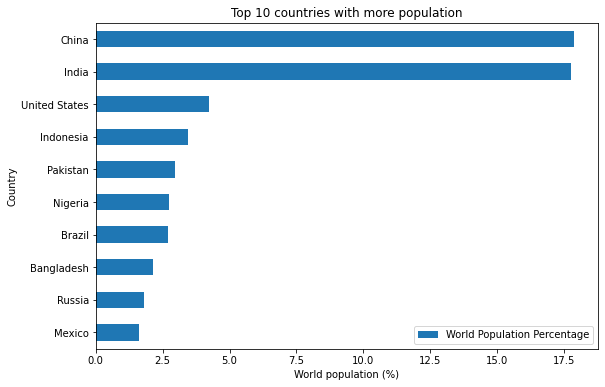

In [18]:
top10countries.sort_values('World Population Percentage', inplace=True)
top10countries.plot(kind='barh',x="Country",y="World Population Percentage",figsize=(9,6))
plt.title("Top 10 countries with more population")
plt.xlabel("World population (%)")

<a id="subsection-two-two"></a>
## Top 10 smallest countries

In [19]:
top10smallest= world.nsmallest(10,['Area (km²)']).sort_values(by='Area (km²)',ascending=False)
top10smallest= top10smallest.loc[:,['Country','2022 Population','Area (km²)','Density (per km²)']]
top10smallest

,Country,2022 Population,Area (km²),Density (per km²)
176,Saint Martin,31791,53,599.8302
188,Sint Maarten,44175,34,1299.2647
119,Macau,695168,30,23172.2667
216,Tuvalu,11312,26,435.0769
142,Nauru,12668,21,603.2381
173,Saint Barthelemy,10967,21,522.2381
209,Tokelau,1871,12,155.9167
76,Gibraltar,32649,6,5441.5000
134,Monaco,36469,2,18234.5000
226,Vatican City,510,1,510.0000


Text(0.5, 1.0, 'Smallest countries in the world')

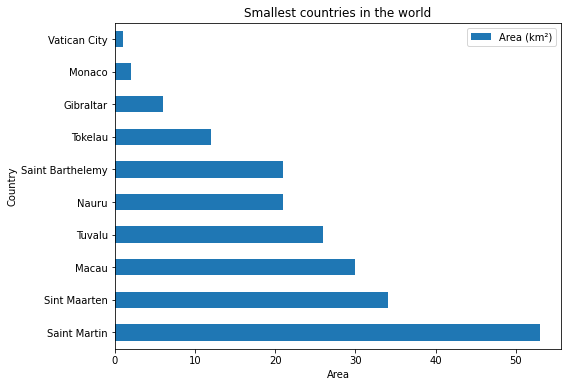

In [20]:
top10smallest.plot(kind='barh',x='Country',y='Area (km²)',figsize=(8,6))
plt.xlabel("Area")
plt.title("Smallest countries in the world")

<a id="subsection-two-three"></a>
## Population growth from 1970 to 2020

In [21]:
world_growth_50year=world.loc[:,['Country','Continent','2020 Population','1970 Population']]
world_growth_50year.columns.values

array(['Country', 'Continent', '2020 Population', '1970 Population'],
      dtype=object)

In [22]:
world_growth_50year['50 Year Growth [%]'] = world_growth_50year['2020 Population'] / world_growth_50year['1970 Population']
world_growth_50year.loc[:,['Country','2020 Population','1970 Population','50 Year Growth [%]']].sort_values(by='50 Year Growth [%]',ascending=False)

,Country,2020 Population,1970 Population,50 Year Growth [%]
219,United Arab Emirates,9287289,298084,31.156617
167,Qatar,2760385,118007,23.391706
130,Mayotte,305587,35383,8.636549
215,Turks and Caicos Islands,44276,5665,7.815711
52,Djibouti,1090156,144379,7.550655
...,...,...,...,...
111,Latvia,1897052,2397414,0.791291
73,Georgia,3765912,4800426,0.784495
226,Vatican City,520,752,0.691489
137,Montserrat,4500,11402,0.394668


In [23]:
top10growth = world_growth_50year.sort_values(by='50 Year Growth [%]',ascending=False).head(10)
last10growth = world_growth_50year.sort_values(by='50 Year Growth [%]',ascending=False).tail(10)

In [24]:
world_growth = top10growth.append(last10growth, ignore_index=True)
world_growth

C:\Users\Mano\AppData\Local\Temp\ipykernel_1128\4174707082.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  world_growth = top10growth.append(last10growth, ignore_index=True)


,Country,Continent,2020 Population,1970 Population,50 Year Growth [%]
0,United Arab Emirates,Asia,9287289,298084,31.156617
1,Qatar,Asia,2760385,118007,23.391706
2,Mayotte,Africa,305587,35383,8.636549
3,Turks and Caicos Islands,North America,44276,5665,7.815711
4,Djibouti,Africa,1090156,144379,7.550655
5,Western Sahara,Africa,556048,76371,7.280879
6,Jordan,Asia,10928721,1557374,7.017403
7,Sint Maarten,North America,43621,6260,6.968211
8,Oman,Asia,4543399,670693,6.774186
9,Bahrain,Asia,1477469,222555,6.638669


<a id="subsection-two-four"></a>
## Countries that represent a % of world population

### Countries that represent less than 0.1% of the world population.

In [25]:
world[world['World Population Percentage'] < 0.1]['Country'].size

132

### Countries that represent more than 2% of the world population.

In [26]:
world[world['World Population Percentage'] > 2].sort_values(by='Rank')

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
149,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
16,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15


<a id="subsection-two-five"></a>
## Overpopulated countries

In [27]:
world.loc[:,['Country','2022 Population','Area (km²)','Density (per km²)',]].sort_values(by='Density (per km²)',ascending=False).head(10)

,Country,2022 Population,Area (km²),Density (per km²)
119,Macau,695168,30,23172.2667
134,Monaco,36469,2,18234.5000
187,Singapore,5975689,710,8416.4634
89,Hong Kong,7488865,1104,6783.3922
76,Gibraltar,32649,6,5441.5000
15,Bahrain,1472233,765,1924.4876
123,Maldives,523787,300,1745.9567
125,Malta,533286,316,1687.6139
188,Sint Maarten,44175,34,1299.2647
22,Bermuda,64184,54,1188.5926


<a id="subsection-two-six"></a>
## Count countries that start with each letter

In [28]:
world[world['Country'].str.startswith('A')]['Country']



0             Afghanistan
1                 Albania
2                 Algeria
3          American Samoa
4                 Andorra
5                  Angola
6                Anguilla
7     Antigua and Barbuda
8               Argentina
9                 Armenia
10                  Aruba
11              Australia
12                Austria
13             Azerbaijan
Name: Country, dtype: object

In [29]:
### Two ways of display it:
print(f"Number of countries that start with the letter A:",world.Country.str.startswith('A').sum(),"\n")
print(f"Number of countries that start with the letter A:",world[world['Country'].str.startswith('A')]['Country'].size,"\n")

Number of countries that start with the letter A: 14 

Number of countries that start with the letter A: 14 



In [30]:
alphabet = string.ascii_uppercase
alphabet_list = list(alphabet)
alphabet_list_4_letters = ['Z','J']
## In this step you can display all the letters(alphabet_list) or a specified list (alphabet_list_4_letters)
for letter in alphabet_list_4_letters:
    print(world[world['Country'].str.startswith(letter)]['Country'],"\n")
    print(f"Number of countries that start with the letter {letter}:",world.Country.str.startswith(letter).sum(),"\n")



232      Zambia
233    Zimbabwe
Name: Country, dtype: object 

Number of countries that start with the letter Z: 2 

101    Jamaica
102      Japan
103     Jersey
104     Jordan
Name: Country, dtype: object 

Number of countries that start with the letter J: 4 



# Ranking of Country's Population

In [31]:
world.sort_values('Rank').reset_index(drop=True)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
1,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
2,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
3,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
4,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,MSR,Montserrat,Brades,North America,4390,4500,5059,4938,5138,10805,11452,11402,102,43.0392,0.9939,0.00
230,231,FLK,Falkland Islands,Stanley,South America,3780,3747,3408,3187,3080,2332,2240,2274,12173,0.3105,1.0043,0.00
231,232,NIU,Niue,Alofi,Oceania,1934,1942,1847,1812,2074,2533,3637,5185,260,7.4385,0.9985,0.00
232,233,TKL,Tokelau,Nukunonu,Oceania,1871,1827,1454,1367,1666,1669,1647,1714,12,155.9167,1.0119,0.00


# 5 Feature Selection

In [32]:
def correlation(worldset, threshold):
    col_corr = set()
    corr_matrix = worldset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr  

In [33]:
x =world.drop('World Population Percentage',axis=1)
y =world['World Population Percentage']

In [34]:
correlation(x,0.9)

{'1970 Population',
 '1980 Population',
 '1990 Population',
 '2000 Population',
 '2010 Population',
 '2015 Population',
 '2020 Population'}

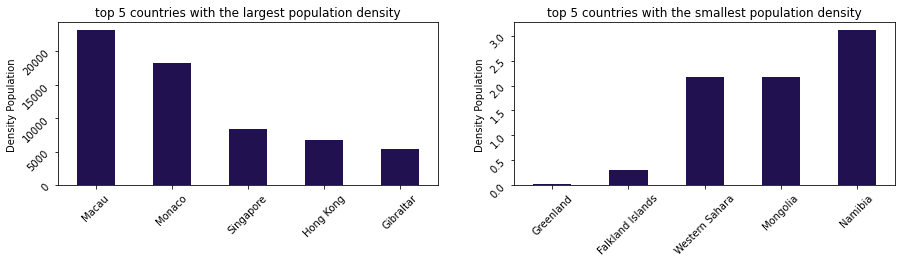

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15,3))
palette_color = sns.color_palette('magma')
world[['Country', 'Density (per km²)']].sort_values(by='Density (per km²)', ascending=False).iloc[:5, :].set_index('Country').plot(kind='bar',
                                                                                                                                   color=palette_color,
                                                                                                                                   legend=False,
                                                                                                                                   ax=ax[0],
                                                                                                                                   xlabel='',
                                                                                                                                   ylabel='Density Population',
                                                                                                                                   title='top 5 countries with the largest population density')
world[['Country', 'Density (per km²)']].sort_values(by='Density (per km²)').iloc[:5, :].set_index('Country').plot(kind='bar',
                                                                                                                  color=palette_color,
                                                                                                                  legend=False,
                                                                                                                  ax=ax[1],
                                                                                                                  xlabel='',
                                                                                                                  ylabel='Density Population',
                                                                                                                  title='top 5 countries with the smallest population density')
ax[0].tick_params(labelrotation=45)
ax[1].tick_params(labelrotation=45)
plt.show()